# 🧠 Module 4 : Word2Vec - Démonstration Pratique

Dans ce notebook, nous allons explorer **Word2Vec**, l'une des techniques révolutionnaires qui a transformé le NLP en introduisant les **word embeddings**.

## 🎯 Objectifs
- Comprendre le concept de Word2Vec
- Entraîner un modèle Word2Vec
- Explorer les relations sémantiques
- Visualiser les embeddings
- Applications pratiques

## 🎬 Comment Word2Vec Apprend ?

### 📚 Étape 1 : Préparation du Texte
```
Texte : "Le chat mange. Le chien mange aussi."
↓
Mots : ["le", "chat", "mange", "le", "chien", "mange", "aussi"]
```

### 🪟 Étape 2 : Fenêtre Glissante
Avec une fenêtre de taille 2, on regarde 2 mots avant et après :

```
[le, chat, mange, le, chien]
     ↑
   mot central

Contexte de "chat" : [le, mange]
```

### 🧮 Étape 3 : Apprentissage
Le modèle ajuste les vecteurs pour que :
- Les mots qui apparaissent ensemble aient des vecteurs proches
- Les mots qui n'apparaissent jamais ensemble aient des vecteurs éloignés

### ✨ La Magie des Vecteurs
Après l'entraînement, on obtient des propriétés étonnantes :

**Similarités** :
- distance(chat, chien) < distance(chat, voiture)

**Analogies** :
- roi - homme + femme ≈ reine
- Paris - France + Italie ≈ Rome

## 🧠 Qu'est-ce que Word2Vec ?

### 🎯 Le Problème Initial
Avant Word2Vec, on représentait les mots avec des méthodes comme "One-Hot Encoding" :
- chat = [0, 0, 1, 0, 0, ...]
- chien = [0, 0, 0, 1, 0, ...]

**Problèmes** : Vecteurs énormes, aucune notion de similarité entre mots !

### 💡 La Solution Word2Vec (Google, 2013)
Word2Vec transforme chaque mot en un **petit vecteur dense** qui capture sa signification :
- chat = [0.2, -0.5, 0.8, 0.1, ...]  (ex: 100 dimensions)
- chien = [0.3, -0.4, 0.7, 0.2, ...]  (vecteur similaire car sens proche)

### 🔑 L'Idée Géniale
**"Les mots qui apparaissent dans des contextes similaires ont des sens similaires"**

Exemple concret :
- "Le **chat** dort sur le canapé"
- "Le **chien** dort sur le canapé"
→ Chat et chien apparaissent dans le même contexte, donc leurs vecteurs seront proches !

### 🎯 Deux Façons d'Apprendre : CBOW vs Skip-gram

#### 1. **CBOW** (Continuous Bag of Words)
**"Devine le mot manquant"**
```
Contexte : ["Le", "___", "mange", "des", "croquettes"]
Prédiction : "chat"
```
- Plus rapide à entraîner
- Bon pour les mots fréquents

#### 2. **Skip-gram**
**"Devine le contexte"**
```
Mot central : "chat"
Prédiction : ["Le", "mange", "des", "croquettes"]
```
- Meilleur pour les mots rares
- Capture mieux les nuances

## ⚠️ Problèmes d'Installation ?

Si vous rencontrez des erreurs avec scipy/gensim, voici des solutions :

### Environnement Conda (Recommandé)
```bash
conda create -n nlp python=3.9
conda activate nlp
conda install -c conda-forge gensim scikit-learn matplotlib pandas
```

## 📦 Installation et Imports

## 🎯 Objectif de ce Notebook

Nous allons :
1. **Comprendre** comment Word2Vec transforme les mots en vecteurs
2. **Entraîner** notre propre modèle sur un corpus d'exemple
3. **Explorer** les relations sémantiques découvertes
4. **Visualiser** comment les mots s'organisent dans l'espace
5. **Tester** des analogies et similarités

C'est parti ! 🚀

In [1]:
# Installation de gensim si nécessaire
# Note: Si vous avez des problèmes avec l'installation, essayez :

# Je conseille d'utiliser python 3.11

!pip install --upgrade pip
!pip install numpy scipy
!pip install gensim
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

try:
    from gensim.models import Word2Vec
    import gensim
    print("✅ Imports réussis !")
    print(f"Gensim version : {gensim.__version__}")
except ImportError:
    print("⚠️ Gensim n'est pas installé. Essayez :")

✅ Imports réussis !
Gensim version : 4.3.3


## 📚 Préparation des Données

In [ ]:
# Prétraitement : tokenisation simple
def preprocess_text(text):
    """Prétraitement basique du texte"""
    # Convertir en minuscules et diviser en mots
    words = text.lower().split()
    # Retirer la ponctuation basique
    words = [word.strip('.,!?;:') for word in words]
    return words

# Préparer les données pour Word2Vec
sentences = [preprocess_text(phrase) for phrase in corpus]

print(f"✅ {len(sentences)} phrases prétraitées")
print("\n📝 Exemple de phrase tokenisée :")
print(f"Original : '{corpus[0]}'")
print(f"Tokenisée : {sentences[0]}")

# Statistiques du vocabulaire
all_words = [word for sentence in sentences for word in sentence]
vocab_size = len(set(all_words))
print(f"\n📊 Statistiques :")
print(f"   - Nombre total de mots : {len(all_words)}")
print(f"   - Taille du vocabulaire : {vocab_size} mots uniques")

In [2]:
# Corpus d'exemple sur le thème de l'IA et de la programmation
corpus = [
    "Python est un excellent langage de programmation pour le machine learning",
    "Le deep learning utilise des réseaux de neurones artificiels",
    "TensorFlow et PyTorch sont des frameworks de deep learning populaires",
    "Les algorithmes de machine learning apprennent à partir de données",
    "Python est très utilisé en data science et intelligence artificielle",
    "Les réseaux de neurones convolutifs sont utilisés pour la vision par ordinateur",
    "Le natural language processing traite le langage humain",
    "Les transformers ont révolutionné le traitement du langage naturel",
    "L'apprentissage supervisé nécessite des données étiquetées",
    "L'apprentissage non supervisé découvre des patterns dans les données",
    "Les modèles de langage comme GPT utilisent l'architecture transformer",
    "Le machine learning est une branche de l'intelligence artificielle",
    "Les embeddings de mots capturent la sémantique du langage",
    "Word2Vec et GloVe sont des techniques d'embeddings populaires",
    "Les vecteurs de mots permettent de calculer des similarités sémantiques",
    "L'intelligence artificielle transforme de nombreux secteurs",
    "Les chatbots utilisent le traitement du langage naturel",
    "Les réseaux de neurones récurrents traitent les séquences",
    "BERT est un modèle de langage pré-entraîné très performant",
    "La data science combine statistiques et programmation"
]

print(f"📚 Corpus : {len(corpus)} phrases")
print("\n📝 Exemples de phrases :")
for i, phrase in enumerate(corpus[:3]):
    print(f"{i+1}. {phrase}")
print("...")

📚 Corpus : 20 phrases

📝 Exemples de phrases :
1. Python est un excellent langage de programmation pour le machine learning
2. Le deep learning utilise des réseaux de neurones artificiels
3. TensorFlow et PyTorch sont des frameworks de deep learning populaires
...


In [ ]:
# Créer et entraîner le modèle Word2Vec
model = Word2Vec(
    sentences=sentences,        # Nos phrases tokenisées
    vector_size=100,           # Chaque mot = vecteur de 100 nombres
    window=5,                  # Regarder 5 mots avant/après
    min_count=1,               # Garder tous les mots (même rares)
    workers=4,                 # Utiliser 4 processeurs
    sg=1,                      # 1 = Skip-gram (meilleur pour apprendre)
    epochs=100,                # Répéter l'apprentissage 100 fois
    seed=42                    # Pour avoir toujours les mêmes résultats
)

print("✅ Modèle Word2Vec entraîné !")
print(f"\n📊 Ce que le modèle a appris :")
print(f"   - Architecture : {'Skip-gram' if model.sg else 'CBOW'}")
print(f"   - Chaque mot est maintenant un vecteur de {model.vector_size} dimensions")
print(f"   - Le modèle connaît {len(model.wv)} mots différents")
print(f"\n💡 Maintenant chaque mot a une 'position' dans un espace à 100 dimensions !")
print("   Les mots similaires sont proches dans cet espace.")

# Créer et entraîner le modèle Word2Vec
model = Word2Vec(
    sentences=sentences,        # Nos phrases tokenisées
    vector_size=100,           # Chaque mot = vecteur de 100 nombres
    window=5,                  # Regarder 5 mots avant/après
    min_count=1,               # Garder tous les mots (même rares)
    workers=4,                 # Utiliser 4 processeurs
    sg=1,                      # 1 = Skip-gram (meilleur pour apprendre)
    epochs=100,                # Répéter l'apprentissage 100 fois
    seed=42                    # Pour avoir toujours les mêmes résultats
)

print("✅ Modèle Word2Vec entraîné !")
print(f"\n📊 Ce que le modèle a appris :")
print(f"   - Architecture : {'Skip-gram' if model.sg else 'CBOW'}")
print(f"   - Chaque mot est maintenant un vecteur de {model.vector_size} dimensions")
print(f"   - Le modèle connaît {len(model.wv)} mots différents")
print(f"\n💡 Maintenant chaque mot a une 'position' dans un espace à 100 dimensions !")
print("   Les mots similaires sont proches dans cet espace.")

In [ ]:
## 🔍 Comprendre les Vecteurs de Mots

In [ ]:
# Regardons à quoi ressemble un vecteur de mot
mot_exemple = "python"
if mot_exemple in model.wv:
    vecteur = model.wv[mot_exemple]
    print(f"🔢 Le mot '{mot_exemple}' est maintenant représenté par {len(vecteur)} nombres :")
    print(f"\n📊 Les 10 premiers nombres du vecteur :")
    for i, val in enumerate(vecteur[:10]):
        print(f"   Dimension {i+1}: {val:.3f}")
    
    print(f"\n💡 Ces nombres capturent le 'sens' du mot !")
    print("   - Pas de signification individuelle")
    print("   - C'est l'ensemble qui représente le mot")
    print("   - Les mots similaires auront des vecteurs similaires")
else:
    print(f"❌ Le mot '{mot_exemple}' n'est pas dans le vocabulaire")

In [ ]:
# Trouver les mots les plus similaires
def explorer_similarites(mot, topn=5):
    """Trouve les mots les plus similaires selon Word2Vec"""
    if mot not in model.wv:
        print(f"❌ '{mot}' n'est pas dans le vocabulaire")
        return
    
    print(f"\n🔍 Les {topn} mots les plus similaires à '{mot}' :")
    print("(Plus le score est proche de 1, plus les mots sont similaires)\n")
    
    similaires = model.wv.most_similar(mot, topn=topn)
    for i, (mot_sim, score) in enumerate(similaires, 1):
        # Visualisation avec des barres
        barre = "█" * int(score * 20)
        print(f"   {i}. {mot_sim:20} {barre} ({score:.3f})")

# Explorer différents mots clés du domaine
print("🧪 EXPÉRIENCE : Le modèle a-t-il compris les relations entre les mots ?")
print("="*60)

mots_test = ["python", "learning", "réseaux", "intelligence"]
for mot in mots_test:
    explorer_similarites(mot)
    
print("\n💡 OBSERVATION : Les mots du même domaine sont proches !")
print("   Le modèle a 'compris' que 'learning' et 'apprentissage' sont liés !")

# Trouver les mots les plus similaires
def explorer_similarites(mot, topn=5):
    """Trouve les mots les plus similaires selon Word2Vec"""
    if mot not in model.wv:
        print(f"❌ '{mot}' n'est pas dans le vocabulaire")
        return
    
    print(f"\n🔍 Les {topn} mots les plus similaires à '{mot}' :")
    print("(Plus le score est proche de 1, plus les mots sont similaires)\n")
    
    similaires = model.wv.most_similar(mot, topn=topn)
    for i, (mot_sim, score) in enumerate(similaires, 1):
        # Visualisation avec des barres
        barre = "█" * int(score * 20)
        print(f"   {i}. {mot_sim:20} {barre} ({score:.3f})")

# Explorer différents mots clés du domaine
print("🧪 EXPÉRIENCE : Le modèle a-t-il compris les relations entre les mots ?")
print("="*60)

mots_test = ["python", "learning", "réseaux", "intelligence"]
for mot in mots_test:
    explorer_similarites(mot)
    
print("\n💡 OBSERVATION : Les mots du même domaine sont proches !")
print("   Le modèle a 'compris' que 'learning' et 'apprentissage' sont liés !")

In [ ]:
# Tester des analogies : A est à B ce que C est à ?
def tester_analogie(a, b, c, topn=3):
    """
    Résout l'analogie : a est à b ce que c est à ?
    Mathématiquement : vecteur(b) - vecteur(a) + vecteur(c) = ?
    """
    try:
        print(f"\n🧮 ANALOGIE : '{a}' est à '{b}' ce que '{c}' est à ... ?")
        print(f"   Calcul : vecteur({b}) - vecteur({a}) + vecteur({c})")
        
        resultat = model.wv.most_similar(
            positive=[b, c],  # Ajouter ces vecteurs
            negative=[a],     # Soustraire ce vecteur
            topn=topn
        )
        
        print(f"\n   📊 Résultats :")
        for i, (mot, score) in enumerate(resultat, 1):
            print(f"      {i}. {mot:20} (confiance: {score:.3f})")
            
    except KeyError as e:
        print(f"❌ Erreur : un des mots n'est pas dans le vocabulaire")

# Tester quelques analogies
print("🔬 EXPÉRIENCE : Les relations entre mots sont-elles mathématiques ?")
print("="*60)

# Analogies dans notre domaine
tester_analogie("machine", "learning", "deep")
tester_analogie("python", "programmation", "tensorflow")
tester_analogie("données", "science", "intelligence")

print("\n💡 NOTE : Avec un petit corpus, les résultats sont limités.")
print("   Sur un grand corpus (Wikipedia), les analogies fonctionnent très bien !")

# Tester des analogies : A est à B ce que C est à ?
def tester_analogie(a, b, c, topn=3):
    """
    Résout l'analogie : a est à b ce que c est à ?
    Mathématiquement : vecteur(b) - vecteur(a) + vecteur(c) = ?
    """
    try:
        print(f"\n🧮 ANALOGIE : '{a}' est à '{b}' ce que '{c}' est à ... ?")
        print(f"   Calcul : vecteur({b}) - vecteur({a}) + vecteur({c})")
        
        resultat = model.wv.most_similar(
            positive=[b, c],  # Ajouter ces vecteurs
            negative=[a],     # Soustraire ce vecteur
            topn=topn
        )
        
        print(f"\n   📊 Résultats :")
        for i, (mot, score) in enumerate(resultat, 1):
            print(f"      {i}. {mot:20} (confiance: {score:.3f})")
            
    except KeyError as e:
        print(f"❌ Erreur : un des mots n'est pas dans le vocabulaire")

# Tester quelques analogies
print("🔬 EXPÉRIENCE : Les relations entre mots sont-elles mathématiques ?")
print("="*60)

# Analogies dans notre domaine
tester_analogie("machine", "learning", "deep")
tester_analogie("python", "programmation", "tensorflow")
tester_analogie("données", "science", "intelligence")

print("\n💡 NOTE : Avec un petit corpus, les résultats sont limités.")
print("   Sur un grand corpus (Wikipedia), les analogies fonctionnent très bien !")

In [6]:
# Trouver les mots les plus similaires
def explorer_similarites(mot, topn=5):
    """Trouve les mots les plus similaires"""
    if mot not in model.wv:
        print(f"❌ '{mot}' n'est pas dans le vocabulaire")
        return
    
    print(f"\n🔍 Mots les plus similaires à '{mot}' :")
    similaires = model.wv.most_similar(mot, topn=topn)
    for i, (mot_sim, score) in enumerate(similaires, 1):
        print(f"   {i}. {mot_sim:20} (similarité: {score:.3f})")

# Explorer différents mots
mots_test = ["python", "learning", "réseaux", "intelligence"]
for mot in mots_test:
    explorer_similarites(mot)


🔍 Mots les plus similaires à 'python' :
   1. de                   (similarité: 0.993)
   2. la                   (similarité: 0.992)
   3. les                  (similarité: 0.991)
   4. science              (similarité: 0.991)
   5. et                   (similarité: 0.991)

🔍 Mots les plus similaires à 'learning' :
   1. de                   (similarité: 0.995)
   2. des                  (similarité: 0.994)
   3. la                   (similarité: 0.994)
   4. les                  (similarité: 0.993)
   5. langage              (similarité: 0.993)

🔍 Mots les plus similaires à 'réseaux' :
   1. des                  (similarité: 0.993)
   2. les                  (similarité: 0.993)
   3. de                   (similarité: 0.993)
   4. sont                 (similarité: 0.992)
   5. la                   (similarité: 0.992)

🔍 Mots les plus similaires à 'intelligence' :
   1. de                   (similarité: 0.993)
   2. les                  (similarité: 0.992)
   3. et                   (

## 🧮 Relations Vectorielles (Analogies)

In [7]:
# Tester des analogies : A est à B ce que C est à ?
def tester_analogie(a, b, c, topn=3):
    """Résout l'analogie : a est à b ce que c est à ?"""
    try:
        # Calculer : vecteur(b) - vecteur(a) + vecteur(c)
        resultat = model.wv.most_similar(
            positive=[b, c],
            negative=[a],
            topn=topn
        )
        
        print(f"\n🧮 Analogie : '{a}' est à '{b}' ce que '{c}' est à ... ?")
        for i, (mot, score) in enumerate(resultat, 1):
            print(f"   {i}. {mot:20} (score: {score:.3f})")
    except KeyError as e:
        print(f"❌ Erreur : un des mots n'est pas dans le vocabulaire - {e}")

# Tester quelques analogies
# Note : avec un petit corpus, les résultats peuvent être limités
tester_analogie("machine", "learning", "deep")
tester_analogie("python", "programmation", "tensorflow")


🧮 Analogie : 'machine' est à 'learning' ce que 'deep' est à ... ?
   1. sont                 (score: 0.982)
   2. des                  (score: 0.981)
   3. permettent           (score: 0.980)

🧮 Analogie : 'python' est à 'programmation' ce que 'tensorflow' est à ... ?
   1. les                  (score: 0.973)
   2. réseaux              (score: 0.971)
   3. de                   (score: 0.971)


## 🔧 Comprendre les Paramètres Clés

### Les paramètres qui influencent l'apprentissage :

1. **vector_size** (50-300) : Dimension des vecteurs
   - Plus grand = plus de nuances, mais plus lent
   - 100-200 est un bon compromis

2. **window** (2-10) : Taille du contexte
   - Plus grand = relations plus larges
   - 5 est standard

3. **sg** (0 ou 1) : Architecture
   - 0 = CBOW (rapide)
   - 1 = Skip-gram (précis)

4. **min_count** : Fréquence minimale
   - Ignorer les mots trop rares
   - 5-10 pour un grand corpus

📌 Mots à visualiser : 15/15


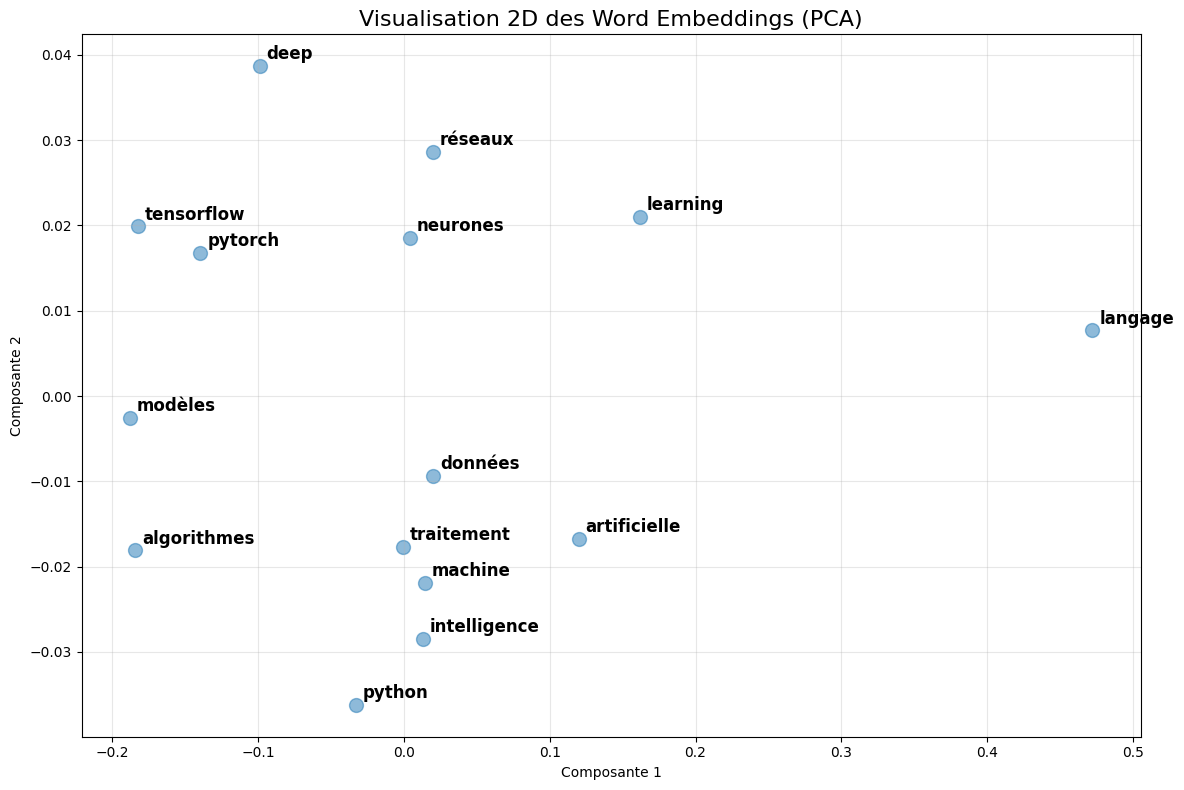


💡 Les mots sémantiquement proches sont regroupés dans l'espace !


In [8]:
# Sélectionner des mots intéressants à visualiser
mots_a_visualiser = [
    'python', 'learning', 'machine', 'deep', 'intelligence', 
    'artificielle', 'réseaux', 'neurones', 'données', 'langage',
    'algorithmes', 'modèles', 'tensorflow', 'pytorch', 'traitement'
]

# Filtrer les mots qui existent dans notre vocabulaire
mots_valides = [mot for mot in mots_a_visualiser if mot in model.wv]
print(f"📌 Mots à visualiser : {len(mots_valides)}/{len(mots_a_visualiser)}")

# Extraire les vecteurs
vecteurs = np.array([model.wv[mot] for mot in mots_valides])

# Réduction de dimension avec PCA
pca = PCA(n_components=2, random_state=42)
vecteurs_2d = pca.fit_transform(vecteurs)

# Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(vecteurs_2d[:, 0], vecteurs_2d[:, 1], alpha=0.5, s=100)

# Ajouter les labels
for i, mot in enumerate(mots_valides):
    plt.annotate(mot, (vecteurs_2d[i, 0], vecteurs_2d[i, 1]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.title('Visualisation 2D des Word Embeddings (PCA)', fontsize=16)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Les mots sémantiquement proches sont regroupés dans l'espace !")

## 🎨 Visualisation avec t-SNE

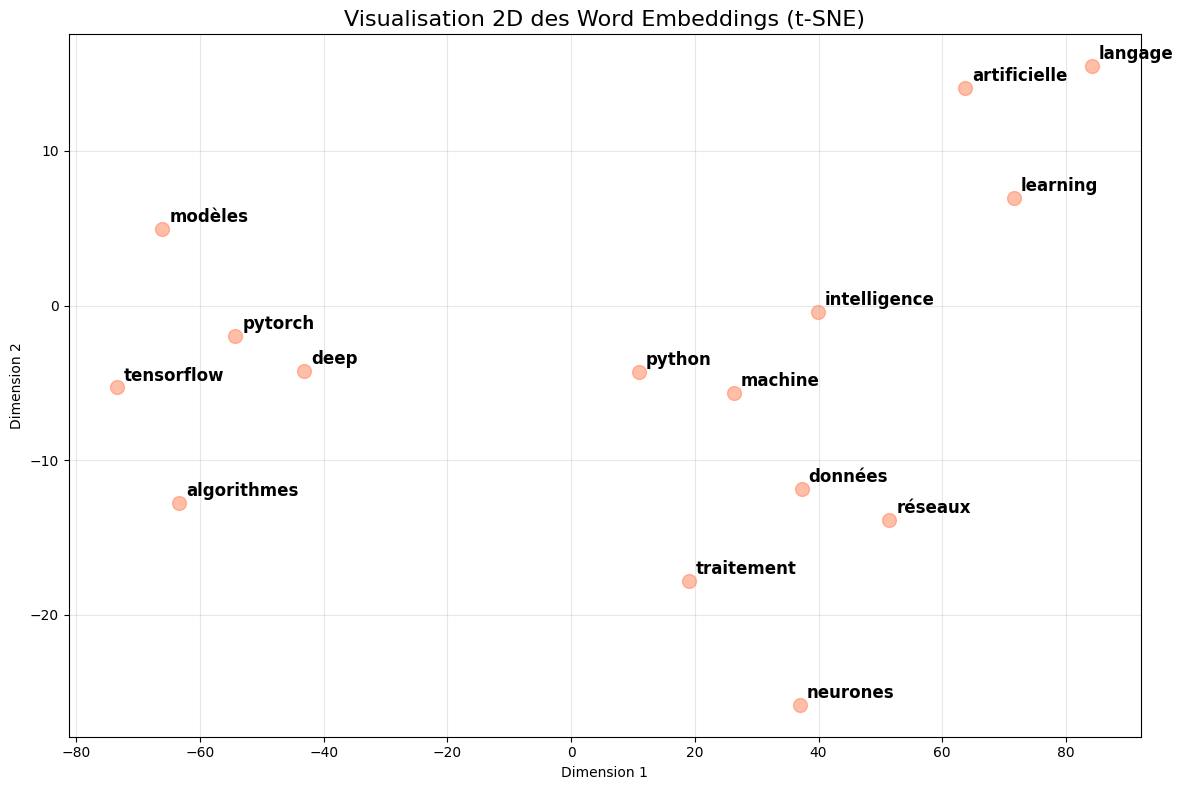


💡 t-SNE révèle mieux les clusters sémantiques !


In [9]:
# t-SNE pour une meilleure visualisation des relations locales
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vecteurs_tsne = tsne.fit_transform(vecteurs)

plt.figure(figsize=(12, 8))
plt.scatter(vecteurs_tsne[:, 0], vecteurs_tsne[:, 1], alpha=0.5, s=100, c='coral')

# Ajouter les labels
for i, mot in enumerate(mots_valides):
    plt.annotate(mot, (vecteurs_tsne[i, 0], vecteurs_tsne[i, 1]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.title('Visualisation 2D des Word Embeddings (t-SNE)', fontsize=16)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 t-SNE révèle mieux les clusters sémantiques !")

## 📋 Résumé : Ce qu'il faut retenir

### ✅ Les Points Clés :

1. **Word2Vec = Mots → Vecteurs**
   - Transforme chaque mot en un vecteur dense (ex: 100 dimensions)
   - Les vecteurs capturent le sens des mots

2. **Le Principe : Contexte = Sens**
   - Les mots qui apparaissent dans des contextes similaires ont des sens proches
   - Le modèle apprend en prédisant les mots à partir de leur contexte

3. **Deux Architectures**
   - **CBOW** : Contexte → Mot (plus rapide)
   - **Skip-gram** : Mot → Contexte (plus précis)

4. **Applications Concrètes**
   - Recherche sémantique
   - Recommandations
   - Classification de texte
   - Base pour des modèles plus complexes

### ⚠️ Limitations de Word2Vec :

1. **Un seul vecteur par mot**
   - "Avocat" (fruit) = "Avocat" (métier) 😕
   - Pas de gestion du contexte

2. **Vocabulaire fixe**
   - Ne peut pas gérer de nouveaux mots
   - Problème pour les fautes de frappe

3. **Besoin de beaucoup de données**
   - Millions de mots pour de bons résultats

### 🚀 L'Évolution :

Word2Vec (2013) a ouvert la voie à :
- **FastText** (2016) : Gère les mots inconnus
- **GloVe** (2014) : Combine approches locales et globales
- **BERT** (2018) : Embeddings contextuels
- **GPT** (2018+) : Modèles de langage puissants

### 💡 En Pratique :

Pour vos projets :
1. Utilisez des modèles pré-entraînés (Google News, Wikipedia)
2. Fine-tunez sur votre domaine spécifique
3. Considérez les modèles plus récents pour des tâches complexes

Word2Vec reste excellent pour :
- Comprendre les embeddings
- Applications simples et rapides
- Ressources limitées

In [10]:
# Comparer différents paramètres
params_tests = [
    {"vector_size": 50, "window": 3, "sg": 0},   # CBOW, petite fenêtre
    {"vector_size": 50, "window": 5, "sg": 1},   # Skip-gram, fenêtre moyenne
    {"vector_size": 100, "window": 7, "sg": 1},  # Skip-gram, grande fenêtre
]

modeles = []
for i, params in enumerate(params_tests):
    print(f"\n🔧 Test {i+1} : {params}")
    
    # Entraîner le modèle
    model_test = Word2Vec(
        sentences=sentences,
        min_count=1,
        epochs=50,
        seed=42,
        **params
    )
    modeles.append(model_test)
    
    # Tester sur quelques mots
    if "python" in model_test.wv:
        similaires = model_test.wv.most_similar("python", topn=3)
        print(f"   Top 3 mots similaires à 'python' :")
        for mot, score in similaires:
            print(f"     - {mot}: {score:.3f}")


🔧 Test 1 : {'vector_size': 50, 'window': 3, 'sg': 0}
   Top 3 mots similaires à 'python' :
     - transformers: 0.393
     - secteurs: 0.367
     - des: 0.342

🔧 Test 2 : {'vector_size': 50, 'window': 5, 'sg': 1}
   Top 3 mots similaires à 'python' :
     - des: 0.610
     - de: 0.594
     - transformers: 0.560

🔧 Test 3 : {'vector_size': 100, 'window': 7, 'sg': 1}
   Top 3 mots similaires à 'python' :
     - de: 0.704
     - le: 0.655
     - les: 0.651


# 🎮 Zone d'expérimentation - À vous de jouer !

# Exercice 1 : Créez votre propre corpus thématique
mon_corpus = [
    # Ajoutez au moins 10 phrases sur un thème de votre choix
    # Exemple sur le thème des animaux :
    "Le chat dort paisiblement sur le canapé du salon",
    "Le chien joue avec sa balle dans le jardin",
    "Les chats aiment chasser les souris la nuit",
    "Mon chien adore se promener dans le parc",
    "Le chat ronronne quand on le caresse doucement",
    "Les chiens sont des animaux très fidèles et loyaux",
    "Le félin observe attentivement les oiseaux par la fenêtre",
    "Le canidé protège la maison de ses maîtres",
    "Les chats dorment environ 16 heures par jour",
    "Le chien remue la queue quand il est content"
]

# Exercice 2 : Entraînez votre modèle
print("🚀 Entraînement de votre modèle...")
mes_phrases = [preprocess_text(phrase) for phrase in mon_corpus]
mon_modele = Word2Vec(
    sentences=mes_phrases, 
    vector_size=50,      # Vecteurs plus petits pour un petit corpus
    window=3, 
    min_count=1, 
    epochs=200,          # Plus d'époques pour compenser le petit corpus
    seed=42
)
print("✅ Modèle entraîné !")

# Exercice 3 : Explorez les similarités
print("\n🔍 Exploration des similarités :")
mots_interessants = ["chat", "chien"]
for mot in mots_interessants:
    if mot in mon_modele.wv:
        print(f"\nMots similaires à '{mot}' :")
        for mot_sim, score in mon_modele.wv.most_similar(mot, topn=3):
            print(f"  - {mot_sim}: {score:.3f}")

# Exercice 4 : Testez une analogie
print("\n🧮 Test d'analogie :")
print("Si 'chat' est à 'félin', alors 'chien' est à ... ?")
try:
    resultat = mon_modele.wv.most_similar(positive=['félin', 'chien'], negative=['chat'], topn=1)
    print(f"Réponse : {resultat[0][0]} (score: {resultat[0][1]:.3f})")
except:
    print("Pas assez de données pour cette analogie")

print("\n💡 Conseil : Plus votre corpus est grand et varié, meilleurs seront les résultats !")

In [11]:
# Sauvegarder le modèle
model_path = "word2vec_demo.model"
model.save(model_path)
print(f"✅ Modèle sauvegardé dans '{model_path}'")

# Charger le modèle
model_charge = Word2Vec.load(model_path)
print("✅ Modèle chargé avec succès")

# Vérifier que ça fonctionne
if "python" in model_charge.wv:
    print(f"\n🔍 Test - Mots similaires à 'python' :")
    for mot, score in model_charge.wv.most_similar("python", topn=3):
        print(f"   - {mot}: {score:.3f}")

✅ Modèle sauvegardé dans 'word2vec_demo.model'
✅ Modèle chargé avec succès

🔍 Test - Mots similaires à 'python' :
   - de: 0.993
   - la: 0.992
   - les: 0.991


## 📋 Résumé et Bonnes Pratiques

### ✅ Ce qu'on a appris :
1. **Word2Vec** transforme les mots en vecteurs denses capturant la sémantique
2. **Deux architectures** : CBOW (rapide) et Skip-gram (meilleur pour mots rares)
3. **Relations vectorielles** : les analogies fonctionnent mathématiquement
4. **Visualisation** : PCA et t-SNE révèlent les clusters sémantiques

### 🎯 Bonnes pratiques :
- **Corpus large** : Word2Vec nécessite beaucoup de données (millions de mots)
- **Prétraitement** : Nettoyer et normaliser le texte
- **Paramètres** :
  - `vector_size`: 100-300 (compromis performance/qualité)
  - `window`: 5-10 (dépend du type de relations à capturer)
  - `min_count`: 5-10 (filtrer les mots rares)
  - Skip-gram généralement meilleur que CBOW

### ⚠️ Limitations :
- **Un vecteur par mot** : pas de gestion de la polysémie
- **Besoin de beaucoup de données** : mauvais sur petits corpus
- **Pas de mots hors vocabulaire** : nouveaux mots non gérés

### 🚀 Pour aller plus loin :
- Utiliser des modèles pré-entraînés (Google News, Wikipedia)
- Explorer FastText (gère les mots hors vocabulaire)
- Passer aux modèles contextuels (BERT, GPT)

## 🚀 Exercice Pratique

In [12]:
# 🎮 Zone d'expérimentation - À vous de jouer !

# 1. Créez votre propre corpus thématique
mon_corpus = [
    # Ajoutez au moins 10 phrases sur un thème de votre choix
    "Exemple : Le chat dort sur le canapé",
    "Exemple : Le chien joue dans le jardin",
    # ...
]

# 2. Entraînez votre modèle (décommentez)
# mes_phrases = [preprocess_text(phrase) for phrase in mon_corpus]
# mon_modele = Word2Vec(mes_phrases, vector_size=50, window=3, min_count=1, epochs=100)

# 3. Explorez les similarités
# if "chat" in mon_modele.wv:
#     print(mon_modele.wv.most_similar("chat", topn=5))

print("✏️ Remplacez les exemples et décommentez le code pour tester !")

✏️ Remplacez les exemples et décommentez le code pour tester !


---

## 🎓 Conclusion

**Word2Vec** a révolutionné le NLP en 2013 en montrant que :
- Les mots peuvent être représentés comme des vecteurs denses
- Ces vecteurs capturent des relations sémantiques complexes
- Les opérations mathématiques sur les vecteurs ont du sens linguistique

C'était le début de l'ère des embeddings, ouvrant la voie à des modèles encore plus sophistiqués !

---
*Module 4 - Formation NLP - Word2Vec avec Python*